In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica" })
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

[Memory Limit in Windows](https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type)

In [2]:
aspect_ratio = 16 / 9
dpi = 1200

results_dir = f'../../T3_3101/res/pictures/plots'
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [33]:
def statistical_parameters(df) -> None:
    min_value = df.min().iat[0]
    max_value = df.max().iat[0]

    print(f"========== {df.columns.values.tolist()[0]} ==========")
    print(f"MEAN: {df.mean().iat[0]}")
    print(f"MEDIAN: {df.median().iat[0]}")
    print(f"MIN: {min_value} (Count: {df.value_counts().loc[min_value].iat[0]})")
    print(f"MAX: {max_value} (Count: {df.value_counts().loc[max_value].iat[0]})")
    print(f"VAR: {df.var().iat[0]}")
    print(f"STDEV: {df.std().iat[0]}")

In [34]:
game_lengths = pd.read_csv("./datasets/game_lengths.csv", names=["game_lengths"], dtype={0:np.uint8})

In [35]:
available_actions = pd.read_csv("./datasets/available_actions.csv", names=["available_actions"], dtype={0:np.uint16})

In [38]:
game_tree_complexity = pd.read_csv("./datasets/game_tree_complexity.csv", names=["game_tree_complexity"], dtype={0:np.float64})

In [36]:
statistical_parameters(game_lengths)

========== game_lengths ==========
MEAN: 42.8176
MEDIAN: 43.0
MIN: 34 (Count: 4000)
MAX: 54 (Count: 2000)
VAR: 8.031931043193113
STDEV: 2.834066167751401


In [37]:
statistical_parameters(available_actions)

========== available_actions ==========
MEAN: 83.65933586478253
MEDIAN: 11.0
MIN: 1 (Count: 130760000)
MAX: 1345 (Count: 2000)
VAR: 22351.213723901034
STDEV: 149.50322312211543


In [39]:
statistical_parameters(game_tree_complexity)

========== game_tree_complexity ==========
MEAN: 1.684452088343085e+38
MEDIAN: 1.6661604897306006e+38
MIN: 4.332579216963305e+34 (Count: 1000)
MAX: 3.4026580865044014e+38 (Count: 1000)
VAR: 9.586017131667273e+75
STDEV: 9.790820768284584e+37


In [8]:
available_actions.mean().iat[0] ** game_lengths.mean().iat[0]

2.0770794654079013e+82

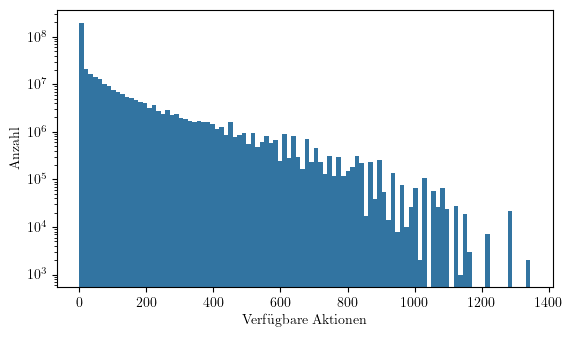

<Figure size 640x480 with 0 Axes>

In [32]:
palette = sns.set_palette(sns.color_palette(["#3274a1"]))

plt.yscale('log', base=10)
ax = sns.histplot(
    available_actions,
    stat='count',
    alpha=1,
    shrink=1,
    color='#3274a1',
    edgecolor=None,
    linewidth=0,
    palette=palette,
    kde=False,
    #bins=[0,1] + list(np.histogram_bin_edges(available_actions, bins=100, range=(2, 1345))),
    bins=np.histogram_bin_edges(available_actions, bins=100, range=(1, 1345)),
    log_scale=False
)
#ax.set_title("Anzahl der Verfügbaren Aktionen")
ax.legend([],[], frameon=False)
ax.set_xlabel("Verfügbare Aktionen")
ax.set_ylabel("Anzahl")


fig = plt.gcf()
if type(aspect_ratio) == float or type(aspect_ratio) == int:
    (width, height) = fig.get_size_inches()
    fig.set_size_inches(width, width / aspect_ratio)

plt.savefig(f'{results_dir}/available_actions.svg', bbox_inches = 'tight', dpi=dpi)
plt.savefig(f'{results_dir}/available_actions.pdf', bbox_inches = 'tight', dpi=dpi)
plt.savefig(f'{results_dir}/available_actions.png', bbox_inches = 'tight', dpi=dpi)
plt.show()
plt.clf()

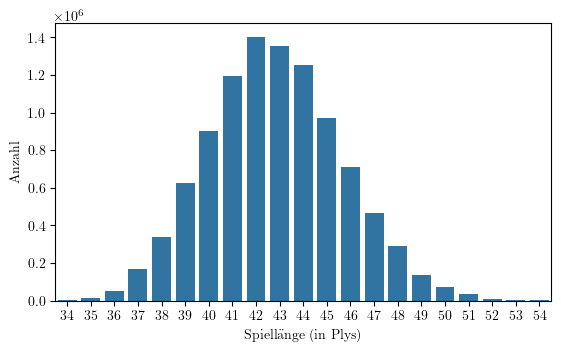

<Figure size 640x480 with 0 Axes>

In [76]:
aspect_ratio = 16 / 9
dpi = 1200

plt.yscale('linear')
#plt.yscale('log', base=10)
ax = sns.countplot(
    game_lengths,
    x="game_lengths",
    stat='count',
    log_scale=False
)
#ax.set_title("Spiellänge der $10$ Millionen Spiele")
ax.set_xlabel("Spiellänge (in Plys)")
#ax.set_ylabel(r"Anzahl (in $\times 10^{6}$)")
ax.set_ylabel(r"Anzahl")
#ax.text(0.01, 14, r"in $1,6 \cdot 10^{6}$")

fig = plt.gcf()
if type(aspect_ratio) == float or type(aspect_ratio) == int:
    (width, height) = fig.get_size_inches()
    fig.set_size_inches(width, width / aspect_ratio)

plt.savefig(f'{results_dir}/game_lengths.svg', bbox_inches = 'tight', dpi=dpi)
plt.savefig(f'{results_dir}/game_lengths.pdf', bbox_inches = 'tight', dpi=dpi)
plt.savefig(f'{results_dir}/game_lengths.png', bbox_inches = 'tight', dpi=dpi)
plt.show()
plt.clf()